In [22]:
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df2=pd.read_csv('final_data.csv',index_col='dates',parse_dates=True)

In [53]:
df2.head()

,frequency
dates,
2015-01-01,95
2015-01-02,51
2015-01-03,43
2015-01-04,58
2015-01-05,53


In [3]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
df2_week=df2['frequency'].resample(rule='W').mean()

In [5]:
df2_week.plot()

In [6]:
adf_test(df2_week)

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.888661
p-value                   0.046683
# lags used               3.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [7]:
from pmdarima import auto_arima

In [8]:
auto_arima(df2_week,seasonal=True,m=52,trace=True).summary()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 52); AIC=1740.994, BIC=1769.165, Fit time=10.923 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=1844.440, BIC=1851.483, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=1776.765, BIC=1790.851, Fit time=2.011 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=1734.376, BIC=1748.462, Fit time=1.857 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 52); AIC=1736.038, BIC=1753.646, Fit time=3.835 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 52); AIC=1745.585, BIC=1756.150, Fit time=0.037 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\AANSHI\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 2, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\AANSHI\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 0, 2, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=1736.104, BIC=1753.711, Fit time=2.228 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=1838.217, BIC=1848.781, Fit time=5.042 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 52); AIC=1736.069, BIC=1753.677, Fit time=4.985 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 52); AIC=1737.900, BIC=1759.029, Fit time=14.102 seconds
Total fit time: 45.608 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -863.188
Date:                            Thu, 07 Nov 2019   AIC                           1734.376
Time:                                    13:33:46   BIC                           1748.462
Sample:                                         0   HQIC                          1740.045
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1117      0.168      0.663      0.507      -0.218       0.442
ma.L1         -0.7180      0.049    -14.559      0.000      -0.815      -0.621
ma.S.L52       0.2555      0.065      3.901      0.000       0.127       0.384
sigma2        57.4371      5.114     11.231      0.000      47.413      67.461
===================================================================================
Ljung-Box (Q):                       34.23   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.73   Prob(JB):                         0.67
Heteroskedasticity (H):               1.85   Skew:                             0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
len(df2_week)

251

In [10]:
train=df2_week.iloc[:201]
test=df2_week.iloc[201:]

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [12]:
model=SARIMAX(train,order=(0,1,1),seasonal_order=(0,0,1,52))

In [13]:
results=model.fit()

C:\Users\AANSHI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          frequency   No. Observations:                  201
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -685.660
Date:                            Thu, 07 Nov 2019   AIC                           1377.320
Time:                                    13:33:51   BIC                           1387.215
Sample:                                01-04-2015   HQIC                          1381.324
                                     - 11-04-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6895      0.055    -12.469      0.000      -0.798      -0.581
ma.S.L52       0.2530      0.078      3.249      0.001       0.100       0.406
sigma2        54.5058      5.847      9.321      0.000      43.045      65.966
===================================================================================
Ljung-Box (Q):                       40.88   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.43   Prob(JB):                         0.82
Heteroskedasticity (H):               1.73   Skew:                            -0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
start=len(train)
end=len(train)+len(test)-1

In [16]:
predictions=results.predict(start,end,typ='levels').rename("SARIMAX predictions")

In [17]:
from statsmodels.tools.eval_measures import rmse

In [18]:
rmse(test,predictions)

9.35350636577579

In [19]:
prediction_f=results.predict(end,end+4,typ='levels').rename("Future Predictions")

In [20]:
prediction_f

2019-10-20    75.317591
2019-10-27    72.385649
2019-11-03    71.467933
2019-11-10    72.726082
2019-11-17    72.726082
Freq: W-SUN, Name: Future Predictions, dtype: float64

Text(0.5,1,'WEEEKLY AVERAGE ANALYSIS AND PREDICTION')

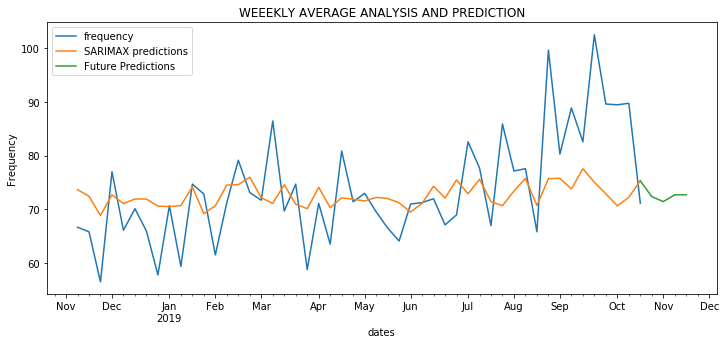

In [35]:
ax=test.plot(legend=True,figsize=(12,5))
predictions.plot(legend=True)
prediction_f.plot(legend=True)
ax.set_ylabel('Frequency')
ax.set_title('WEEEKLY AVERAGE ANALYSIS AND PREDICTION')

In [48]:
result=seasonal_decompose(df2_week,model='mul')
from pylab import rcParams
rcParams['figure.figsize']=8,5

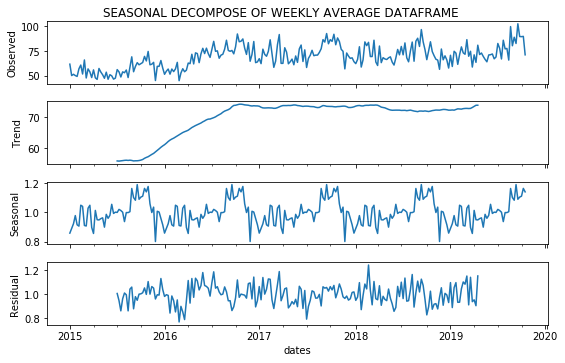

In [52]:
result.plot().suptitle('SEASONAL DECOMPOSE OF WEEKLY AVERAGE DATAFRAME', y=1);